In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# importing os module for environment variables
import os
# importing necessary functions from dotenv library
from dotenv import load_dotenv, dotenv_values 

In [3]:

# loading variables from .env file
load_dotenv() 
 
# accessing and printing value
ALPHAVANTAGE_API_KEY = os.getenv("ALPHAVANTAGE_API_KEY")
print(os.getenv("ALPHAVANTAGE_API_KEY"))

SGRQ1JQEJ152DE6W


In [4]:
df = web.DataReader("snd", "av-daily", start=datetime(2016, 1, 1), end=datetime.now(), api_key=ALPHAVANTAGE_API_KEY)

In [5]:
df['date'] = pd.to_datetime(df.index) # df.index
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df.set_index(['year', 'quarter', 'month', 'date'], inplace=True)
df['date'] = df.index.get_level_values('date')
df.head(10)

open     high    low  close   volume  \
year quarter month date                                                
2016 4       11    2016-11-04  10.30  11.0700  10.30  10.99  3419720   
                   2016-11-07  11.03  11.7500  10.99  11.07   599717   
                   2016-11-08  11.10  11.2500  10.90  11.07   267382   
                   2016-11-09  11.00  12.0500  11.00  11.58   270679   
                   2016-11-10  11.41  11.8500  11.27  11.57   287974   
                   2016-11-11  11.50  11.5575  11.33  11.36    43952   
                   2016-11-14  11.35  11.4000  10.93  11.18    80816   
                   2016-11-15  11.15  11.7955  11.14  11.20    83626   
                   2016-11-16  11.06  11.1450  10.89  10.98   232328   
                   2016-11-17  10.96  11.1499  10.75  10.97    43369   

                                    date  
year quarter month date                   
2016 4       11    2016-11-04 2016-11-04  
                   2016-11-07 2016-11-07  
                   2016-11-08 2016-11-08  
                   2016-11-09 2016-11-09  
                   2016-11-10 2016-11-10  
                   2016-11-11 2016-11-11  
                   2016-11-14 2016-11-14  
                   2016-11-15 2016-11-15  
                   2016-11-16 2016-11-16  
                   2016-11-17 2016-11-17

In [6]:
yearly_data = df.groupby(['year'])[['date','open', 'high', 'low', 'close']].agg({
    'date': 'min',
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last'
}).reset_index()
quarterly_data = df.groupby(['year', 'quarter'])[['date','open', 'high', 'low', 'close']].agg({
    'date': 'min',
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last'
}).reset_index()
mothly_data = df.groupby(['year', 'quarter', 'month'])[['date','open', 'high', 'low', 'close']].agg({
    'date': 'min',
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last'
}).reset_index()

yearly_data['date'] = yearly_data['date'].apply(lambda x: x.replace(day=1))
quarterly_data['date'] = quarterly_data['date'].apply(lambda x: x.replace(day=1))
mothly_data['date'] = mothly_data['date'].apply(lambda x: x.replace(day=1))


In [7]:
mothly_data.head(20)

,year,quarter,month,date,open,high,low,close
0,2016,4,11,2016-11-01,10.30,14.350,10.300,13.67
1,2016,4,12,2016-12-01,13.80,17.000,12.650,16.55
2,2017,1,1,2017-01-01,16.75,19.840,16.205,17.40
3,2017,1,2,2017-02-01,16.89,21.990,16.340,17.17
4,2017,1,3,2017-03-01,17.39,18.719,12.510,16.25
5,2017,2,4,2017-04-01,16.29,16.670,12.160,12.18
6,2017,2,5,2017-05-01,12.17,13.700,9.040,9.74
7,2017,2,6,2017-06-01,9.86,10.410,7.510,8.91
8,2017,3,7,2017-07-01,8.94,9.200,5.900,6.58
9,2017,3,8,2017-08-01,6.40,6.920,4.810,5.97


In [8]:
def prepend_statement_to_column_name(columns, statement):
  cols = {}
  for idx, col in enumerate(columns): 
    cols.update({col: statement + ' ' + col})
  
  return cols

In [9]:
bsh = pd.read_csv('../data/snd-bs-q-20-12.csv', sep='\t', encoding="latin-1", index_col=0, dtype=str).T
ist = pd.read_csv('../data/snd-is-q-20-12.csv', sep='\t', encoding="latin-1", index_col=0, dtype=str).T
cfs = pd.read_csv('../data/snd-cf-q-20-12.csv', sep='\t', encoding="latin-1", index_col=0, dtype=str).T
# cols = df.iloc[0]
# df[0:][5:]
# df.dropna(inplace = True)  

bsh.rename(columns=prepend_statement_to_column_name(bsh.columns, "bs"), inplace=True)
ist.rename(columns=prepend_statement_to_column_name(ist.columns, "is"), inplace=True)
cfs.rename(columns=prepend_statement_to_column_name(cfs.columns, "cf"), inplace=True)

# col = pd.to_datetime(bsh.index, format='%d.%m.%Y', dayfirst=True)
col = pd.to_datetime(bsh.index, format='mixed', dayfirst=True)
bsh.set_index(col, inplace=True)
bsh['date'] = col


# bsh.rename(columns=cl, inplace=True)

# bsh.columns[:]
# col = pd.to_datetime(ist.index, format='%d.%m.%Y', dayfirst=True)
col = pd.to_datetime(ist.index, format='mixed', dayfirst=True)
ist['date'] = col
ist.set_index(col, inplace=True)


# col = pd.to_datetime(cfs.index, format='%d.%m.%Y', dayfirst=True)
col = pd.to_datetime(cfs.index, format='mixed', dayfirst=True)
cfs.set_index(col, inplace=True)
cfs['date'] = col
# ist['year'] = col.year
# ist[ 'quarter'] = col.quarter
# ist[ 'month'] = col.month
# ist.columns[:]
# ist[['Revenues', 'Cost of Goods Sold', 'Selling General & Admin Expenses', 'Interest Expense']][0:10]

merged = pd.merge(bsh, ist, on='date', how='outer', validate='1:m', sort=True)
merged = pd.merge(merged, cfs, on='date', how='outer', validate='1:m', sort=True)
# merged.columns[:]
merged.insert(0, 'month', col.month)
merged.insert(0, 'quarter', col.quarter)
merged.insert(0, 'year', col.year)
col = merged.pop('date')
merged.insert(0, 'date', col)

# merged.dtypes[['Change In Accounts Receivable', 'Cost of Goods Sold', 'Selling General & Admin Expenses', 'Interest Expense']]


In [10]:
# quarterly_data[:10]
merged.set_index(['year', 'quarter'], inplace=True)
quarterly_data.set_index(['year', 'quarter'], inplace=True)

In [11]:
quarterly_data[:10]

date   open   high    low  close
year quarter                                       
2016 4       2016-11-01  10.30  17.00  10.30  16.55
2017 1       2017-01-01  16.75  21.99  12.51  16.25
     2       2017-04-01  16.29  16.67   7.51   8.91
     3       2017-07-01   8.94   9.20   4.81   6.78
     4       2017-10-01   6.63   9.61   6.30   8.66
2018 1       2018-01-01   8.25  11.06   5.34   5.82
     2       2018-04-01   5.77   8.14   4.84   5.31
     3       2018-07-01   5.28   6.19   4.08   4.11
     4       2018-10-01   4.17   4.56   1.92   2.22
2019 1       2019-01-01   2.18   4.68   2.15   4.45

In [12]:
q_data = pd.merge(merged, quarterly_data, right_index=True, left_index=True, how='outer', validate='1:1', sort=True) # yearly_data

q_data.insert(0, 'date', q_data['date_x'])
q_data.drop(['date_x', 'date_y'], axis=1, inplace=True)    

In [13]:
# merged.to_csv('../data/merged.csv', index=True, encoding='utf-8', sep='\t')

q_data[:10]


date  month bs Cash And Equivalents  \
year quarter                                             
2016 4       2016-12-31   12.0                   46,56   
2017 1       2017-03-31    3.0                   72,67   
     2       2017-06-30    6.0                   63,36   
     3       2017-09-30    9.0                   51,33   
     4       2017-12-31   12.0                   34,74   
2018 1       2018-03-31    3.0                    2,14   
     2       2018-06-30    6.0                    1,75   
     3       2018-09-30    9.0                    1,19   
     4       2018-12-31   12.0                    1,47   
2019 1       2019-03-31    3.0                    2,37   

             bs Total Cash And Short Term Investments bs Accounts Receivable  \
year quarter                                                                   
2016 4                                          46,56                   5,74   
2017 1                                          72,67                  10,80   
     2                                          63,36                  14,96   
     3                                          51,33                  21,53   
     4                                          34,74                  24,57   
2018 1                                           2,14                  27,90   
     2                                           1,75                  28,99   
     3                                           1,19                  31,09   
     4                                           1,47                  26,81   
2019 1                                           2,37                  39,52   

             bs Other Receivables bs Total Receivables bs Inventory  \
year quarter                                                          
2016 4                       0,03                 5,77        10,34   
2017 1                       0,24                11,04         9,08   
     2                       0,49                15,46         8,81   
     3                       0,74                22,27         7,67   
     4                       0,80                24,57         9,53   
2018 1                       1,60                29,50         5,27   
     2                       1,10                30,09        11,55   
     3                       1,10                32,19        16,40   
     4                        NaN                26,81        18,58   
2019 1                        NaN                39,52        13,57   

             bs Prepaid Expenses bs Restricted Cash  ...  \
year quarter                                         ...   
2016 4                      1,38               0,97  ...   
2017 1                      1,34               0,97  ...   
     2                      1,34               0,49  ...   
     3                      0,94               0,49  ...   
     4                      3,85               0,49  ...   
2018 1                      1,93               0,49  ...   
     2                      1,98                NaN  ...   
     3                      2,02                NaN  ...   
     4                      3,24                NaN  ...   
2019 1                      2,17                NaN  ...   

             cf    % Free Cash Flow Margins  \
year quarter                                  
2016 4                               61,6 %   
2017 1                                8,9 %   
     2                             (31,2 %)   
     3                             (30,4 %)   
     4                             (38,4 %)   
2018 1                            (113,7 %)   
     2                                1,0 %   
     3                              (0,0 %)   
     4                                5,3 %   
2019 1                              (4,2 %)   

             cf Cash and Cash Equivalents, Beginning of Period  \
year quarter                                                     
2016 4                                                    3,90   
2017 1                  

In [14]:
import re

def normalize_string(s):
    """
    Normalize a string by converting to lowercase, trimming, replacing non-alphanumeric characters with underscores,
    replacing spaces with underscores, and collapsing multiple consecutive underscores into a single underscore.
    
    :param s: The input string
    :return: The normalized string
    """
    s = s.lower()  # convert to lowercase
    s = s.strip()  # trim from both sides
    s = re.sub(r'[^a-zA-Z0-9\s%&]', '_', s)  # replace non-alphanumeric characters with underscores
    s = re.sub(r'\s', '_', s)  # replace spaces with underscores
    s = s.replace("&", "_and_") # replace '&' with '_and_'
    # Move '%' to the end of the string and prepend an underscore
    if '%' in s:
        s = s.replace('%', '')  # remove '%' from the string                
        s = s + '_%'  # append '_%' to the end of the string    
                
    s = s.strip('_')  # trim underscores from the start and end of the string
    s = re.sub(r'_+', '_', s)  # collapse multiple consecutive underscores into a single underscore
    return s

In [15]:
# merged[['date', 'Revenues', 'EBITDA', 'Price Close']][0:10]
# merged['Revenues'] = pd.to_numeric(merged['Revenues'], errors='coerce')
row = []
cols = {}
for idx, col in enumerate(q_data.columns): 
  row.append([col, normalize_string(col)])
  cols.update({col: normalize_string(col)})
  # print(col, normalize_string(col))

ndf = q_data.rename(columns=cols, inplace=False)
# dict.fromkeys(row[0:], row[1:])
# print (merged.columns)
ndf[1:10]
# Export the column names to a CSV file
pd.DataFrame(row).to_csv('../data/column_names.csv', columns=[0, 1], index=False)



In [16]:
import re
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
      
def normalize_number(val:str):
  if pd.isna(val):
    # return not a number
    return np.nan 
  if isinstance(val, (datetime)) or isinstance(val, int) or isinstance(val, float):
    return val
  
  is_procent = False
  is_negative = False
  val = val.strip().replace(' ', '')
  if '%' in val:
    is_procent = True
    val = val.replace('%', '')    
  if '(' in val:
    is_negative = True
    val = val.replace('(', '')
    val = val.replace(')', '')    
  
  val = val.replace(',', '.')  
  if not is_float(val):
    return val
  
  val = float(val)
  if is_procent:
    val = val / 100
  if is_negative:
    val = -val
  if val =='':
    return np.nan
  return val

In [17]:
ndf[:10]

date  month bs_cash_and_equivalents  \
year quarter                                             
2016 4       2016-12-31   12.0                   46,56   
2017 1       2017-03-31    3.0                   72,67   
     2       2017-06-30    6.0                   63,36   
     3       2017-09-30    9.0                   51,33   
     4       2017-12-31   12.0                   34,74   
2018 1       2018-03-31    3.0                    2,14   
     2       2018-06-30    6.0                    1,75   
     3       2018-09-30    9.0                    1,19   
     4       2018-12-31   12.0                    1,47   
2019 1       2019-03-31    3.0                    2,37   

             bs_total_cash_and_short_term_investments bs_accounts_receivable  \
year quarter                                                                   
2016 4                                          46,56                   5,74   
2017 1                                          72,67                  10,80   
     2                                          63,36                  14,96   
     3                                          51,33                  21,53   
     4                                          34,74                  24,57   
2018 1                                           2,14                  27,90   
     2                                           1,75                  28,99   
     3                                           1,19                  31,09   
     4                                           1,47                  26,81   
2019 1                                           2,37                  39,52   

             bs_other_receivables bs_total_receivables bs_inventory  \
year quarter                                                          
2016 4                       0,03                 5,77        10,34   
2017 1                       0,24                11,04         9,08   
     2                       0,49                15,46         8,81   
     3                       0,74                22,27         7,67   
     4                       0,80                24,57         9,53   
2018 1                       1,60                29,50         5,27   
     2                       1,10                30,09        11,55   
     3                       1,10                32,19        16,40   
     4                        NaN                26,81        18,58   
2019 1                        NaN                39,52        13,57   

             bs_prepaid_expenses bs_restricted_cash  ...  \
year quarter                                         ...   
2016 4                      1,38               0,97  ...   
2017 1                      1,34               0,97  ...   
     2                      1,34               0,49  ...   
     3                      0,94               0,49  ...   
     4                      3,85               0,49  ...   
2018 1                      1,93               0,49  ...   
     2                      1,98                NaN  ...   
     3                      2,02                NaN  ...   
     4                      3,24                NaN  ...   
2019 1                      2,17                NaN  ...   

             cf_free_cash_flow_margins_%  \
year quarter                               
2016 4                            61,6 %   
2017 1                             8,9 %   
     2                          (31,2 %)   
     3                          (30,4 %)   
     4                          (38,4 %)   
2018 1                         (113,7 %)   
     2                             1,0 %   
     3                           (0,0 %)   
     4                             5,3 %   
2019 1                           (4,2 %)   

             cf_cash_and_cash_equivalents_beginning_of_period  \
year quarter                                                    
2016 4                                                   3,90   
2017 1                                                  47,53  

In [18]:
# Change all columns to the appropriate types
# merged = pd.to_numeric(merged, errors='coerce')
# ndf.columns[:]

cols_dupl = [col for col in ndf.columns if col.endswith('_y')]
# cols_dupl[:]
# col = ['date', 'supplementary_data_y', 'net_income_y', 'depreciation_and_amortization_y'] + ['supplementary_data_x', 'net_income_x', 'depreciation_and_amortization_x']

qndf = ndf.loc[:, ~ndf.columns.duplicated(keep='first')]


# nndf = qndf['bs_comprehensive_income_and_other'].map(normalize_number)
nndf = qndf.map(normalize_number)


# for idx, col in enumerate(nndf.columns):
    # if 'is_' in col: 
        # print(f"Column {idx}: {col}")
        # print("_"*60, "\n", nndf.iloc[:, idx])
# res_df = ctdf[res]
# nndf['bs_comprehensive_income_and_other'][20]
# nndf['cf_change_in_accounts_receivable']


year  quarter
2016  4          -2.71
2017  1          -5.05
      2          -4.17
      3          -6.57
      4          -3.04
2018  1          -3.33
      2          -0.98
      3          -2.10
      4           4.24
2019  1         -12.70
      2         -13.45
      3          -6.98
      4          -4.88
2020  1           5.63
      2           2.04
      3         -19.19
      4           5.44
2021  1           2.97
      2          35.69
      3          -4.98
      4          -2.79
2022  1          -8.81
      2          -8.80
      3           2.78
      4          -1.63
2023  1          -1.44
      2           7.01
      3           6.07
      4          -1.61
2024  1         -11.98
      2           7.21
      3            NaN
Name: cf_change_in_accounts_receivable, dtype: float64

In [19]:
nndf.to_csv('../data/nndf.csv', index=False, encoding='utf-8', sep='\t', decimal=',')

# type(nndf['bs_cash_and_equivalents'][10])
sdata = nndf[['date', 'is_revenues', 'is_net_income', 'is_ebitda', 'cf_cash_from_operations', 'is_weighted_average_diluted_shares_outstanding', 'high', 'low']]

sdata['calc_PE_low'] = (sdata['is_weighted_average_diluted_shares_outstanding']*sdata['low']) / (sdata['is_net_income']*4)
sdata['calc_PE_high'] = (sdata['is_weighted_average_diluted_shares_outstanding']*sdata['high']) / (sdata['is_net_income']*4)
sdata['calc_PS_low'] = (sdata['is_weighted_average_diluted_shares_outstanding']*sdata['low']) / (sdata['is_revenues']*4)
sdata['calc_PS_high'] = (sdata['is_weighted_average_diluted_shares_outstanding']*sdata['high']) / (sdata['is_revenues']*4)

sdata.loc[(2022, 1):(2023,4)][['is_revenues', 'is_net_income', 'is_ebitda', 'low', 'high', 'calc_PS_low', 'calc_PS_high', 'calc_PE_low', 'calc_PE_high']]

C:\Users\PWeigner\AppData\Local\Temp\ipykernel_13604\2391234941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['calc_PE_low'] = (sdata['is_weighted_average_diluted_shares_outstanding']*sdata['low']) / (sdata['is_net_income']*4)
C:\Users\PWeigner\AppData\Local\Temp\ipykernel_13604\2391234941.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['calc_PE_high'] = (sdata['is_weighted_average_diluted_shares_outstanding']*sdata['high']) / (sdata['is_net_income']*4)
C:\Users\PWeigner\AppData\Local\

is_revenues  is_net_income  is_ebitda     low   high  \
year quarter                                                         
2022 1              41.61          -5.92      -3.18  1.7681  4.820   
     2              68.71          -0.09       8.21  1.9700  4.950   
     3              71.59           2.68      10.21  1.3700  2.555   
     4              73.83           2.63       7.83  1.5400  2.640   
2023 1              82.35          -3.60       7.03  1.5600  2.650   
     2              74.78           6.31      10.09  1.4400  1.975   
     3              76.90           6.73      12.05  1.6100  2.480   
     4              61.95          -4.79      -1.41  1.8200  2.300   

              calc_PS_low  calc_PS_high  calc_PE_low  calc_PE_high  
year quarter                                                        
2022 1           0.447124      1.218901    -3.142708     -8.567306  
     2           0.302338      0.759682  -230.818333   -579.975000  
     3           0.203424      0.379378     5.433993     10.134198  
     4           0.223501      0.383145     6.274183     10.755741  
2023 1           0.195450      0.332014    -4.470917     -7.594826  
     2           0.182792      0.250705     2.166276      2.971107  
     3           0.201041      0.309678     2.297181      3.538514  
     4           0.282768      0.357345    -3.657098     -4.621608

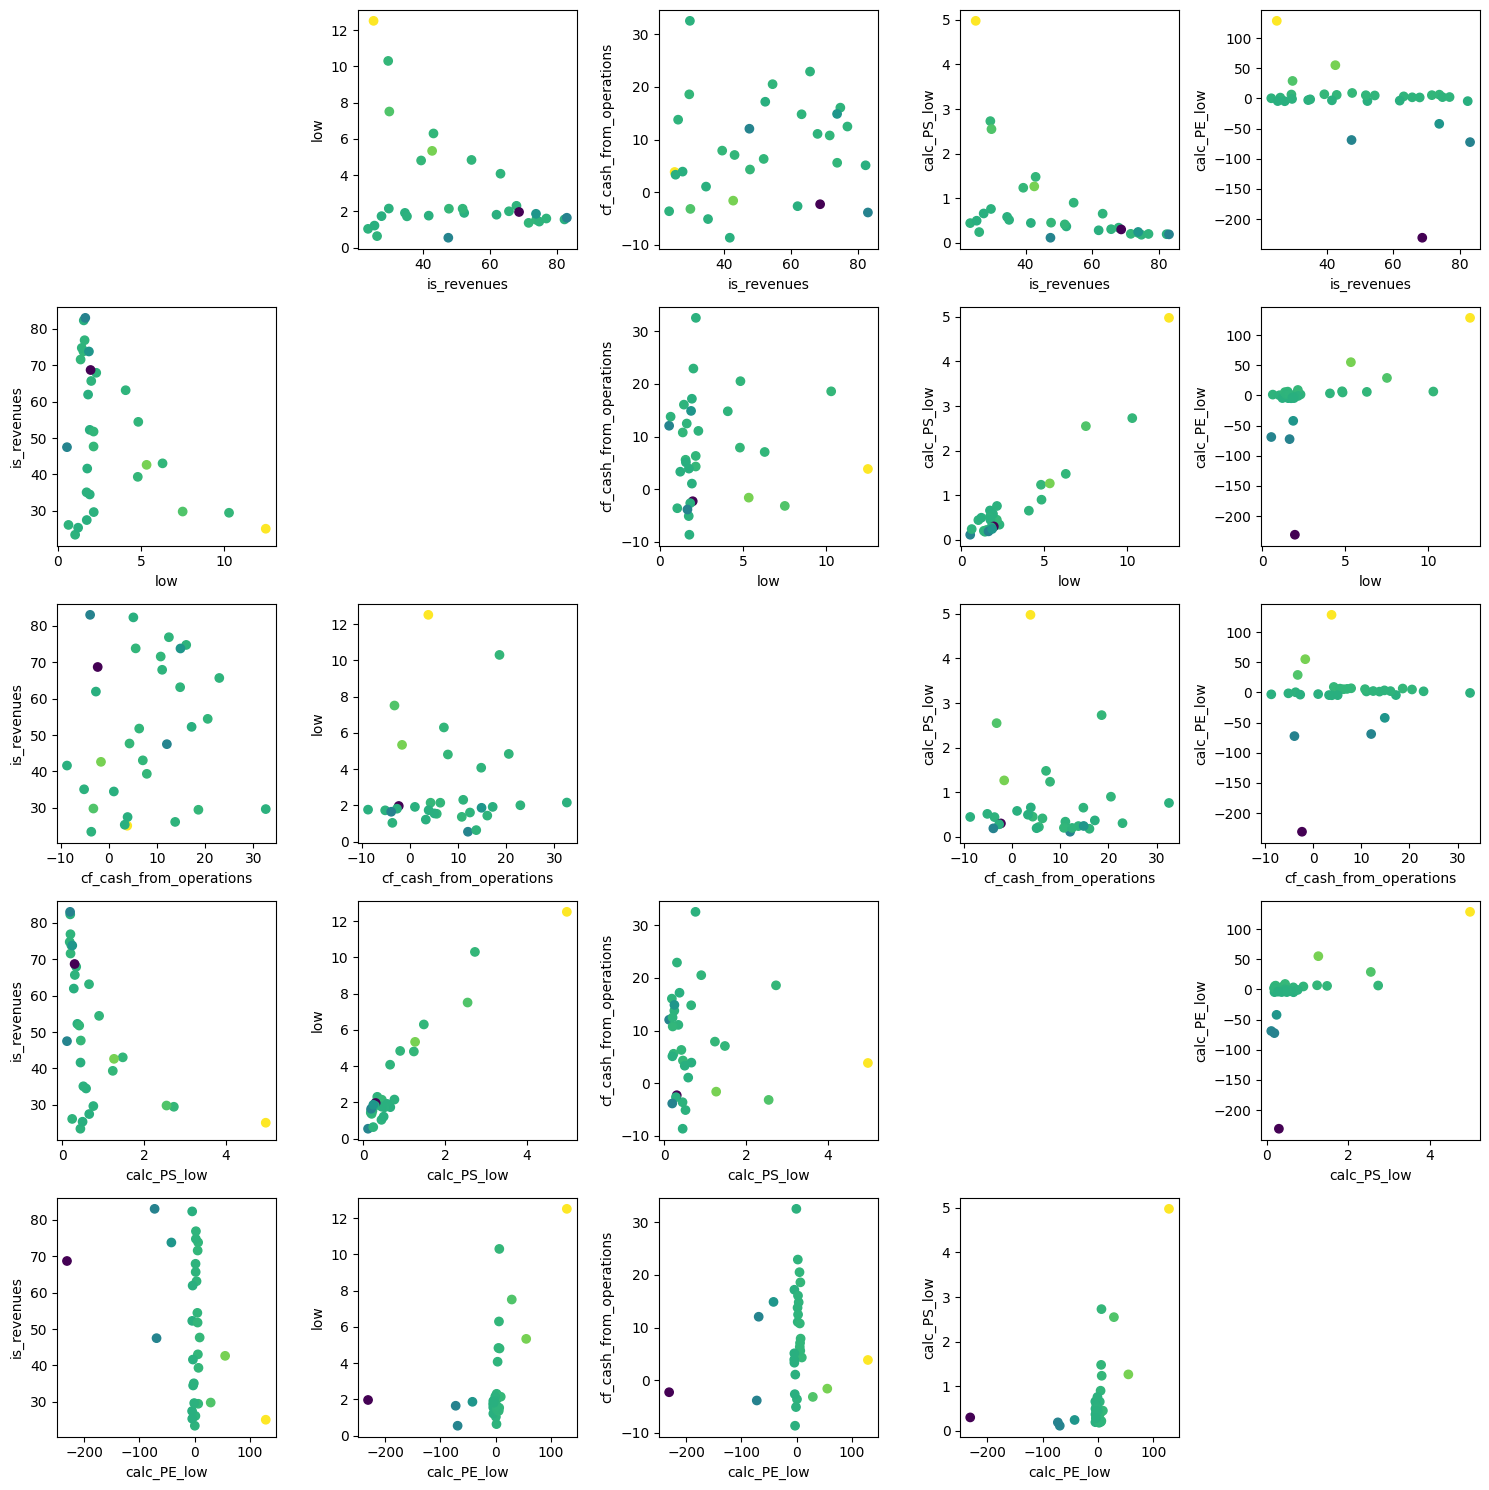

In [20]:
# vykresleni korelacniho diagramu pro dvojici vybranych atributu
# první sloupec: x-ové souřadnice
# druhý sloupec: y-ové souřadnice
# 
# plt.title("Classes")
# vykresleni mrizky korelacnich diagramu
fig, axes = plt.subplots(nrows=5, ncols=5)

# rozmery grafu
fig.set_figheight(15)
fig.set_figwidth(15)
# ist[['Revenues', 'Cost of Goods Sold']]

feature_names = ['is_revenues', 'low', 'cf_cash_from_operations', 'calc_PS_low', 'calc_PE_low']
target = sdata['calc_PE_low'].to_numpy()
data = sdata[feature_names].to_numpy()

# vyplneni mrizky
for row in range(5):
    for column in range(5):
        ax = axes[row][column]
        if row == column:
            # na diagonale jsou prazdna mista
            fig.delaxes(ax)
            continue
        # pridat korelacni diagram do mrizky
        # print(f"row: {row}, col: {column}, {data[:, row]}, {target}")
        scatter = ax.scatter(data[:, row], data[:, column], c=target)
        # popisky os
        ax.set(xlabel=feature_names[row], ylabel=feature_names[column])
 
 
# zbavit se prazdneho mista okolo bunek mrizky
plt.tight_layout()

# ulozeni diagramu do souboru
plt.savefig("52.png")
 
# zobrazeni diagramu
plt.show()


In [21]:
# sdata[sdata['calc_PS_low'].eq(np.nan)]['calc_PS_low'] #  | ~sdata['calc_PS_high'].eq(np.nan)
sdata[sdata['calc_PS_low'] < 1.0 ]

gdata = sdata.dropna(subset=['calc_PS_low', 'calc_PS_high'])
gdata[['date', 'calc_PS_low', 'calc_PS_high']]

date  calc_PS_low  calc_PS_high
year quarter                                      
2016 4       2016-12-31     2.728888      4.503990
2017 1       2017-03-31     4.975795      8.746422
     2       2017-06-30     2.549341      5.658791
     3       2017-09-30     1.235826      2.363743
     4       2017-12-31     1.479856      2.257368
2018 1       2018-03-31     1.266418      2.622956
     2       2018-06-30     0.901111      1.515505
     3       2018-09-30     0.654964      0.993684
     4       2018-12-31     0.369853      0.878400
2019 1       2019-03-31     0.415218      0.903824
     2       2019-06-30     0.341451      0.682902
     3       2019-09-30     0.307819      0.506905
     4       2019-12-31     0.453724      0.616220
2020 1       2020-03-31     0.116074      0.540274
     2       2020-06-30     0.242911      0.656618
     3       2020-09-30     0.443921      0.780192
     4       2020-12-31     0.497340      0.929455
2021 1       2021-03-31     0.659710      1.391458
     2       2021-06-30     0.760628      1.464912
     3       2021-09-30     0.582599      1.058994
     4       2021-12-31     0.516214      0.850380
2022 1       2022-03-31     0.447124      1.218901
     2       2022-06-30     0.302338      0.759682
     3       2022-09-30     0.203424      0.379378
     4       2022-12-31     0.223501      0.383145
2023 1       2023-03-31     0.195450      0.332014
     2       2023-06-30     0.182792      0.250705
     3       2023-09-30     0.201041      0.309678
     4       2023-12-31     0.282768      0.357345
2024 1       2024-03-31     0.191755      0.260797
     2       2024-06-30     0.245279      0.321355

ValueError: 'x' is not 1-dimensional

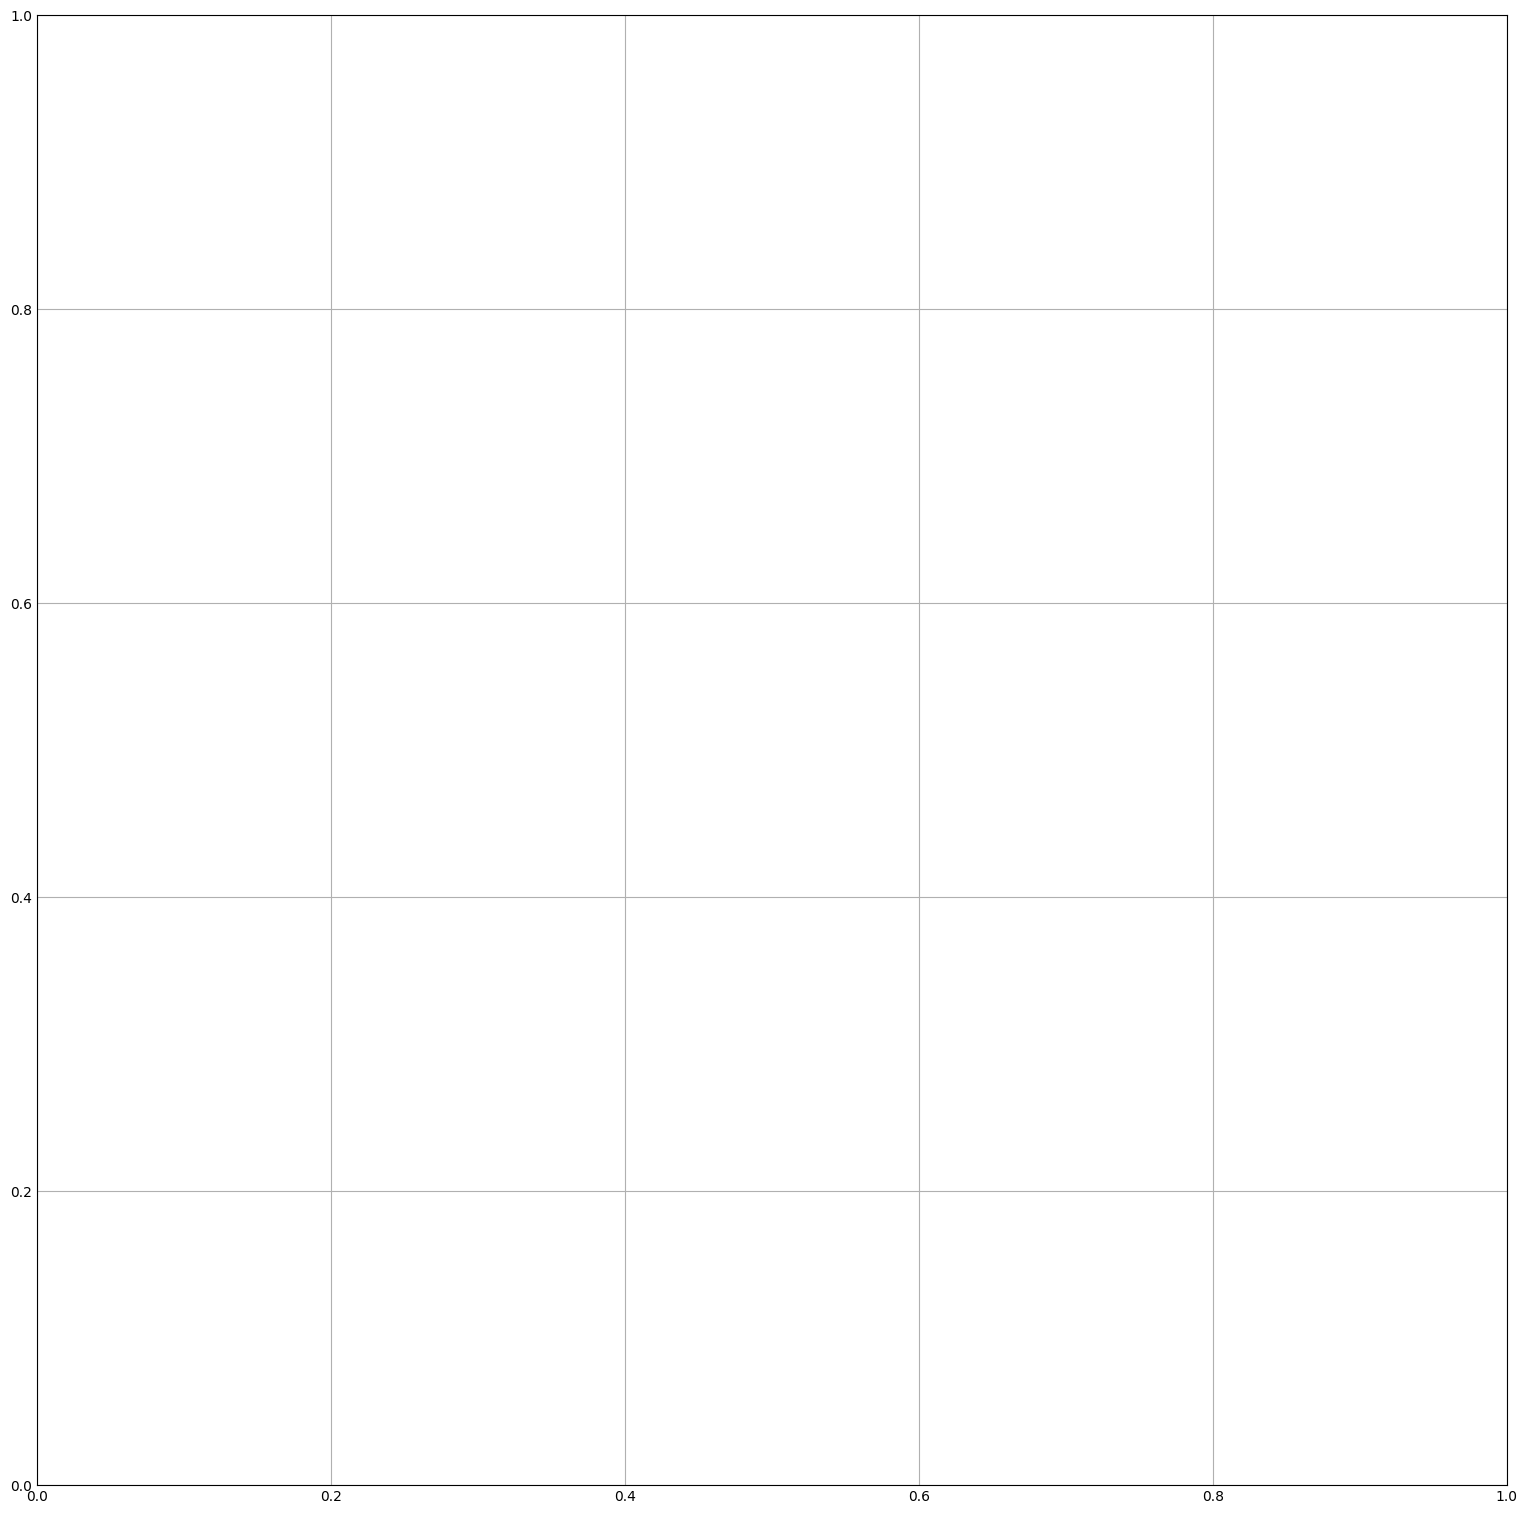

In [22]:
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
# np.random.seed(1)
x = np.linspace(gdata['date'].dt.year.to_numpy(), 8, 16)
# x = gdata['date'].to_numpy()
# y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
# y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))
y1 = gdata['calc_PS_low'].to_numpy(dtype=float)
y2 = gdata['calc_PS_high'].to_numpy(dtype=float)

# plot
fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)

ax.set(xlim=(pd.to_datetime(np.min(x)).dt.year, pd.to_datetime(np.max(x)).dt.year), 
       xticks=np.arange(1, relativedelta(pd.to_datetime(np.max(x)), pd.to_datetime(np.min(x))).years),
       yticks=np.arange(np.min(y1), np.max(y2)),       
       ylim=(min(np.min(y1), np.min(y2)), max(np.max(y1), np.max(y2))))
# , yticks=np.arange(min(y1, y2), max(y1, y2)), yticks=np.arange(1, 8)
plt.show()

In [ ]:
from dateutil.relativedelta import relativedelta

# type(pd.to_datetime(np.max(x)))
# print(relativedelta(pd.to_datetime(np.max(x)), pd.to_datetime(np.min(x))).years)
# np.arange(1, relativedelta(pd.to_datetime(np.max(x)), pd.to_datetime(np.min(x))).years)
# np.min(x)
gdata['date'].dt.year.to_numpy()

array([2016, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2019, 2019,
       2019, 2019, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2022,
       2022, 2022, 2022, 2023, 2023, 2023, 2023, 2024, 2024])

In [ ]:


# vyplneni mrizky
for row in range(4):
    for column in range(4):
        ax = axes[row][column]
        if row == column:
            # na diagonale jsou prazdna mista
            fig.delaxes(ax)
            continue
        # pridat korelacni diagram do mrizky
        scatter = ax.scatter(data[:, row], data[:, column], c=target)
        # popisky os
        ax.set(xlabel=feature_names[row], ylabel=feature_names[column])
 
 
# zbavit se prazdneho mista okolo bunek mrizky
plt.tight_layout()

# ulozeni diagramu do souboru
plt.savefig("52.png")
 
# zobrazeni diagramu
plt.show()

In [75]:
# is_revenues, is_cost_of_goods_sold, is_selling_general_and_admin_expenses, is_provision_for_bad_debts, is_depreciation_and_amortization, is_total_operating_expenses, is_operating_income, is_interest_expense  , is_income_tax_expense, is_net_income_to_company, close, high, low, open, volume
# df[['is_revenues', 'is_cost_of_goods_sold', 'is_selling_general_and_admin_expenses', 'is_provision_for_bad_debts', 'is_depreciation_and_amortization', 'is_total_operating_expenses', 'is_operating_income', 'is_interest_expense', 'is_income_tax_expense', 'is_net_income_to_company', 'close', 'high', 'low', 'open', 'volume']]
l = ['date', 'is_revenues', 'is_cost_of_goods_sold', 'is_selling_general_and_admin_expenses', 'is_total_operating_expenses', 'is_operating_income', 'is_interest_expense', 'is_income_tax_expense', 'is_net_income_to_company']
"""k = nndf.keys()
for key in k:
  print(key)
  if key not in l:
    print(f"Not in keys {key}")

yearly_data = df.groupby(['year'])[['date','open', 'high', 'low', 'close']].agg({
    'date': 'min',
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last'
}).reset_index()
"""
is_yearly_data = nndf[l]
# is_yearly_data[:10]
# yearly_data[:10]


gyearly_data = is_yearly_data.groupby(['year'])[['date', 'is_revenues', 'is_cost_of_goods_sold', 'is_selling_general_and_admin_expenses', 'is_total_operating_expenses', 'is_operating_income', 'is_interest_expense', 'is_income_tax_expense', 'is_net_income_to_company']].agg({
    'date': 'min',
    'date': 'count',
    'is_revenues': 'sum',
    'is_cost_of_goods_sold': 'sum',
    'is_selling_general_and_admin_expenses': 'sum',
    'is_total_operating_expenses': 'sum',
    'is_operating_income': 'sum',
    'is_interest_expense': 'sum',
    'is_income_tax_expense': 'sum',
    'is_net_income_to_company': 'sum'
}).reset_index()
gyearly_data = gyearly_data[gyearly_data['date']==4]
gyearly_data.set_index('year', inplace=True)
# yearly_data.set_index('year', inplace=True)
# gyearly_data[:10]
# yearly_data[:10]
gyearly_data.merge(yearly_data, left_index=True, right_index=True, how='inner', validate='1:1', sort=True)
gyearly_data[:10]
# nndf.loc[(2016, 4):(2020, 3), (l)][:5]
# nndf[:10]

,date,is_revenues,is_cost_of_goods_sold,is_selling_general_and_admin_expenses,is_total_operating_expenses,is_operating_income,is_interest_expense,is_income_tax_expense,is_net_income_to_company
year,,,,,,,,,
2017,4,137.22,-100.31,-17.67,-18.20,18.70,-0.70,2.80,21.53
2018,4,212.48,-144.91,-23.02,-24.87,42.70,-2.32,-5.11,18.70
2019,4,233.08,-152.03,-22.89,-25.30,55.75,-3.63,-7.80,31.63
2020,4,122.35,-104.23,-25.52,-27.44,-9.32,-2.12,12.98,37.96
2021,4,126.65,-142.56,-26.01,-47.58,-63.49,-2.02,9.02,-50.67
2022,4,255.74,-226.15,-30.77,-33.02,-3.43,-1.66,3.20,-0.70
2023,4,295.98,-254.42,-38.72,-41.26,0.30,-1.53,6.90,4.65
